# Week 11

### Elaboration on Week 10 ICE Q2 class discussion

- Why does the result of `.rstrip('\n')` still have 3 elements?
- In what case will `rstrip()` return only 2 elements?

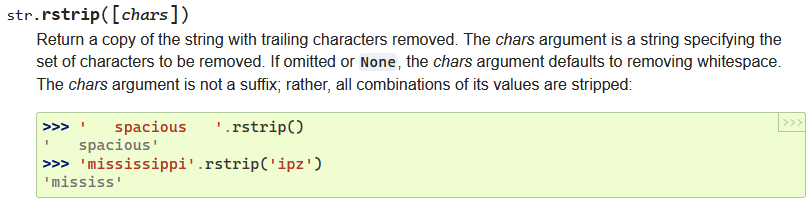

In [ ]:
# assume that we have read a file as follows:
# lines = []
# for line in open('example.txt', 'r') as f:
#     lines.append(line)

lines = [
    'Harry Potter and the Chamber of Secrets	J.K. Rowling	$17.96\n',
    'Harry Potter and the Deathly Hallows	J.K. Rowling	\n'
]

i = 1
for line in lines:
    # using .rstrip()
    print('Line ' + str(i))
    columns_1 = line.rstrip().split('\t')
    print('\tnum columns in rstrip() = ' + str(len(columns_1)))
    
    columns_2 = line.rstrip('\n').split('\t')
    print('\tnum columns in rstrip(\'\\n\') = ' + str(len(columns_2)))
    print()

    i += 1

#### Explanation
`rstrip()` will remove **all** continuous [whitespace](https://docs.python.org/3/library/string.html#string.whitespace) (e.g., space, tab, newline) characters from the end of the string.

By providing a parameter to `rstrip()`, we can control what characters are removed.

---

For example, for Line 2 in the cell above, there is a tab character ('`\t`') followed immediately by a newline character ('`\n`').

#### When using `rstrip()`
Using `rstrip()` with no parameters will remove both the tab and newline characters, giving us the following string:
```
'Harry Potter and the Deathly Hallows	J.K. Rowling'
```
Note that there is only 1 tab character in this string, and therefore will only have 2 elements after splitting by the tab character (i.e., `split('\t')`)

####  When using `rstrip('\n')`
To retain the last tab character, we use `rstrip('\n')` to only strip the newline character, giving us the following string:
```
'Harry Potter and the Deathly Hallows	J.K. Rowling	'
```
Note that the two tab characters are retained, and therefore will only have 3 elements after splitting.

P.s. this is only an issue when the data in the last column is missing. For Line 1, both ways of calling `rstrip()` will produce a list with 3 elements.

## Reflections

### Pedagogy
- feel that pre-class activity is not enough to prep us for the ICEs
- ICE's level of difficulty is much higher than that of the pre-class exercises 
    - Yes. Pre-class readings are going through the syntax, they are __not__ exercise questions.
    - ICE requires you combine your syntax knowledge with programming skills to solve the questions.
    - TLDR: pre-class readings are necessary but not sufficient conditions to doing the ICEs.

### Content
- question 2 was very difficult
    - Make sure you read and understand the question first before writing any code.
    - Open the data (`.txt`) file and make sure that the format is what you expect.
    - Please practice reading and writing such data files, the code does not vary much between questions.

- (Response to "Which topic/activity did you find the most CHALLENGING?") everything :")
- while loop
    - Oh no :')
    - I cannot repeat all the content for the next 3 hours, please come for a consultation if you are lost

## Week 10 ICE

### Qn 1(a)

```
def sum_up(input_file_names):
   with open (input_file_names,"r") as input_file:
       sum_of_numbers= 0
       for line in input_file:
           line=line.rstrip("\n")
           sum_of_numbers+=float(line)
   return (sum_of_numbers)
```

Why does the code not work when we do print(sum_of_numbers) instead of return ? 
- Not sure what you mean by "not work", it does not show an error
- However, the question asks for you to write a function that **returns** the result 

In [ ]:
def sum_up(input_file_names):
    with open (input_file_names,"r") as input_file:
        sum_of_numbers= 0
        for line in input_file:
            line=line.rstrip("\n")
            sum_of_numbers+=float(line)
    return (sum_of_numbers)  # this does not give an error
    # print (sum_of_numbers)   # this also does not give an error

sum_up('q1-1.txt')

### Qn 2(a) 
- `float( price[1 : ] )` returns an error, what could be the reason for this?
    - `price[1:]` is a list slicing operation, it will return a `List` type
    - Can you call `float()` on a list?
    - Read the error message to help with your debugging!

In [ ]:
price = ['title', 'author', '10.10']
float(price[1:])  # what does the error message say?

### Qn 2(b)
- would it be possible to use while loop to solve this? i feel like the idea makes sense, but it cant be executed when i try to run the code 
    - Recall that for-loops are used when you know how many iterations you need, while-loops are used when you want to iterate until some condition is true
    - What are we iterating here?

### Qn 3 (I will assume it is ICE unless you indicate otherwise)

In [ ]:
def is_sg_number(query_number):
    # check for numbers with no country code
    if '+' not in query_number:
        return True

    # otherwise, we find the country code:
    # this returns us everything after the '+' symbol
    query_number = query_number.split('+')[1]

    # next, we iterate through the position indices of query_number,
    # and if the character at that position is not ' ' or ')', 
    # we continue adding it to the country_code
    country_code = ''
    query_index = 0
    
    continue_adding = query_number[query_index] != ' ' and query_number[query_index] != ')'

    while query_index < len(query_number) and continue_adding:
        # we add the character at query_index to country_code
        country_code += query_number[query_index]
        
        # debugging: make sure your code is doing what you think it is doing!
        # print('country_code: ' + country_code)
        
        # increment the position index for the next iteration,
        query_index += 1
        # and check if we should continue adding characters to country_code
        continue_adding = not (query_number[query_index] == ' ' or query_number[query_index] == ')')

    return country_code == '65'

with open('phone_book.txt', 'r') as f:
    for line in f:
        name, phone_number = line.rstrip('\n').split('|')
        if is_sg_number(phone_number):
            print(name + '\t' + phone_number)

In [ ]:
with open('phone_book.txt', 'r') as f:
    
    # this list stores all the data from the input file,
    # so we don't have to keep reading it. Note that
    # you can only iterate over the lines of a 
    # file object **once** for each open()
    all_records = []
    
    # we read all the information from the file,
    # and store it in [name, number] lists
    for line in f:
        all_records.append(line.rstrip('\n').split('|'))

    # next, we find all the people in all_records
    unique_persons = []
    for (name, number) in all_records:
        if name not in unique_persons:
            unique_persons.append(name)
    
    # for each name,
    for person in unique_persons:
        # we first print their name,
        print(person)

        # and for each record in all_records
        for (name, number) in all_records:
            if name == person:
                # we print the number if the name matches
                print(number)

        # lastly, print the newline separating names
        print()

### Qn 4

In [ ]:
# we first read the file, and store the records
# notice how this block is similar to Qn 3
all_records = []
with open('news.txt', 'r') as f:
    for line in f:
        all_records.append(line.rstrip('\n'))

# get the user input
query_keyword = input('Enter a keyword or keyphrase')
print()  # follow question output format
counter = 1  # tracks the number of output lines

# next, we iterate over all records,
for record in all_records:
    #  and check if the keyword appears in the (lower-cased) record line
    if query_keyword in record.lower():
        print(str(counter) + '. ' + record)
        # increment the counter for the next output line
        counter += 1

In [ ]:
# as suggested by the question, we define a function that
# takes in a list of headlines and a keyword as its parameters,
# and returns a list of matching headlines.
def get_matching_headlines(search_records, keyword):
    results = []
    for record in search_records:
        if keyword in record.lower():
            results.append(record)
    return results

# next, we load all records from the given input file
all_records = []
with open('news.txt', 'r') as f:
    for line in f:
        all_records.append(line.rstrip('\n'))

# we want to search until the user enters something other than 'Y'
do_search = input('Do you want to search our news database? [Y|N] :') == 'Y'

while do_search:
    # we get the keyword to search for,
    search_keyword = input('Please enter a keyword or keyphrase :')
    # and use the search_records() function to get the list of matching headlines
    matching_headlines = get_matching_headlines(all_records, search_keyword)

    # if no matching headlines, print the error message
    if not matching_headlines:  # same as "if len(matching_headlines) == 0"
        print('\nThere is no matching headline!\n')
    
    # otherwise, print the matching headlines
    else:
        print('\nThere are ' + str(len(results)) + ' matching headlines:')
        counter = 1
        for result in matching_headlines:
            print(str(counter) + '. ' + result)
            counter += 1
        print()
    do_search = input('Do you want to search again? [Y|N] :') == 'Y'
print('Good-bye!')

## Lab 6
### Q7: [ &bigstar;&bigstar;&bigstar; ] Line-up

A group of students need to line up for the procession of an event. We only have the information about every pair of students who are next to each other. We use a list of tuples to represent this line-up information: Each element of the list is a tuple that contains the name of a student (call him/her A) and the name of the student behind A. 

For example, ```("Alice", "Bob")``` means Bob is behind Alice. The list ```[("Alice", "Bob"), ("Bob", "Chris")]``` means Bob is behind Alice and Chris behind Bob. 

For the student who's at the very end of the line-up, we use an empty string to indicate that there's nobody behind this student. E.g., ```("Darren", "")``` means there's nobody behind Darren, i.e., Darren is at the end of the line-up.

Given a list of tuples that contains the line-up information of every pair of students who are next to each other, implement a function that returns the students in a list based on their order in the line-up.

__Example 1:__ ```get_lineup([("Chris", "Darren"), ("Alice", "Bob"), ("Darren", ""), ("Bob", "Chris")])``` should return ```["Alice", "Bob", "Chris", "Darren"]```.


__Example 2:__

Given the following code,

```
info = [("Mary", "Jason"), ("John", "Alan"), ("Jason", "George"), ("Alan", "Christie"), ("Christie", "Mary"), ("George", "")]
print(get_lineup(info))
```

we should see the following output:

```
['John', 'Alan', 'Christie', 'Mary', 'Jason', 'George']
```


__Note:__ If the list passed to the function is empty, the function returns an empty list.

In [ ]:
# Put your code below

def get_lineup(student_pairs):
    
    # idea: we want to build the order from back to front,
    # so we start with a list containing an empty string,
    # and add new students to the front of the list
    
    result = [""]  # we know that the last position must be an empty string

    # 2(!!) class part marks for anyone who is able to explain why:
    num_students = len(student_pairs)
    
    # now that we know there are num_students, we will repeatedly iterate
    # through student_pairs until result contains num_students + 1 elements
    # (to account for the empty string in result)
    while len(result) != num_students + 1:
        for (front_student, next_student) in student_pairs:

            # if the "next" student in the pair is at the front of result,
            # we will add the "front" student to result, in the front
            if result[0] == next_student:
                result = [front_student] + result

    # we remove the empty string from the result before returning it
    return result[:-1]


In [ ]:
# Test Case 1
get_lineup([("Chris", "Darren"), ("Alice", "Bob"), ("Darren", ""), ("Bob", "Chris")]) 

In [ ]:
# Test Case 2
info = [("Mary", "Jason"), ("John", "Alan"), ("Jason", "George"), ("Alan", "Christie"), ("Christie", "Mary"), ("George", "")]
print(get_lineup(info))